<a href="https://colab.research.google.com/github/emilymacris/ds4002-project3/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/emilymacris/ds4002-project3.git

Cloning into 'ds4002-project3'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 44 (delta 12), reused 5 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 2.11 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
%cd /content/ds4002-project3/SCRIPTS


/content/ds4002-project3/SCRIPTS


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install earthengine-api
!pip install geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00


In [5]:
import ee
import geemap

In [6]:
ee.Authenticate()
ee.Initialize(project='ee-bdf7bz')


In [7]:
aoi = ee.Geometry.Rectangle([-147.5, 60.7, -146.5, 61.3])  # Columbia Glacier area

# Use the new Collection 2 dataset
image = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(aoi) \
    .filterDate('2021-06-01', '2021-08-31') \
    .median() \
    .clip(aoi)

Map = geemap.Map(center=[60.9, -147.0], zoom=9)
Map.addLayer(image, {'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'min': 0, 'max': 30000}, 'True Color')
Map


Map(center=[60.9, -147.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [8]:
# Compute NDSI (snow/ice index)
ndsi = image.normalizedDifference(['SR_B3', 'SR_B6']).rename('NDSI')

# Compute NDVI (vegetation index)
ndvi = image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')

# Add them to your image
image = image.addBands([ndsi, ndvi])

In [9]:
stats = image.reduceRegion(
    reducer=ee.Reducer.mean().combine(
        ee.Reducer.minMax(), sharedInputs=True
    ),
    geometry=aoi,
    scale=30,
    maxPixels=1e9  # set this high enough
)

print(stats.getInfo())

{'NDSI_max': 0.6992718423254874, 'NDSI_mean': 0.27645546402542265, 'NDSI_min': -0.24924760601915186, 'NDVI_max': 0.49193415019168607, 'NDVI_mean': 0.002331219555157146, 'NDVI_min': -0.24774450769641793, 'QA_PIXEL_max': 55052, 'QA_PIXEL_mean': 29214.648746123956, 'QA_PIXEL_min': 21824, 'QA_RADSAT_max': 0, 'QA_RADSAT_mean': 0, 'QA_RADSAT_min': 0, 'SR_B1_max': 51294, 'SR_B1_mean': 27955.507232166037, 'SR_B1_min': 7268.5, 'SR_B2_max': 51687, 'SR_B2_mean': 27746.56865703108, 'SR_B2_min': 7390.5, 'SR_B3_max': 50195, 'SR_B3_mean': 26570.27409479051, 'SR_B3_min': 7616, 'SR_B4_max': 49245, 'SR_B4_mean': 26063.758652711276, 'SR_B4_min': 7233.5, 'SR_B5_max': 43481, 'SR_B5_mean': 25575.654640620916, 'SR_B5_min': 7181.5, 'SR_B6_max': 25396.5, 'SR_B6_mean': 13499.973213853436, 'SR_B6_min': 7273, 'SR_B7_max': 20268.5, 'SR_B7_mean': 13170.400187243331, 'SR_B7_min': 7438.5, 'SR_QA_AEROSOL_max': 224, 'SR_QA_AEROSOL_mean': 204.2497175921161, 'SR_QA_AEROSOL_min': 1, 'ST_ATRAN_max': 9404, 'ST_ATRAN_mean': 

In [10]:
import geopandas as gpd
import pandas as pd

# Replace with the actual shared path
base_path = '/content/drive/MyDrive/DS4002_Project/P3_Emily_Karan/'

# Load glacier polygons (class 1)
gdf_g1 = gpd.read_file(base_path + 'sample_glacier1.geojson')
gdf_g2 = gpd.read_file(base_path + 'sample_glacier2.geojson')
gdf_g3 = gpd.read_file(base_path + 'sample_glacier3.geojson')  # Add more as needed
gdf_g4 = gpd.read_file(base_path + 'sample_glacier4.geojson')
gdf_g5 = gpd.read_file(base_path + 'sample_glacier5.geojson')
gdf_g6 = gpd.read_file(base_path + 'sample_glacier6.geojson')

# Combine all glacier samples into a single DataFrame
glacier_df = pd.concat([gdf_g1, gdf_g2, gdf_g3, gdf_g4, gdf_g5, gdf_g6], ignore_index=True)

# Optional: Preview the data
glacier_df.head()


,id,NDSI,NDVI,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,class,geometry
0,0_0,0.338488,-0.001883,34198.5,32157.5,31661.5,31542.5,15893.0,15303.0,1,MULTIPOINT EMPTY
1,0_1,0.348116,-0.002242,34108.5,32116.5,31633.5,31492.0,15530.0,15230.5,1,MULTIPOINT EMPTY
2,0_2,0.348116,-0.002242,34108.5,32116.5,31633.5,31492.0,15530.0,15230.5,1,MULTIPOINT EMPTY
3,0_3,0.352595,-0.002040,34052.0,32092.0,31561.5,31433.0,15360.5,15064.0,1,MULTIPOINT EMPTY
4,0_4,0.352595,-0.002040,34052.0,32092.0,31561.5,31433.0,15360.5,15064.0,1,MULTIPOINT EMPTY


In [11]:
ngdf1 = gpd.read_file(base_path + 'sample_nonglacier1.geojson')
ngdf2 = gpd.read_file(base_path + 'sample_nonglacier2.geojson')
ngdf3 = gpd.read_file(base_path + 'sample_nonglacier3.geojson')
ngdf4 = gpd.read_file(base_path + 'sample_nonglacier4.geojson')
ngdf5 = gpd.read_file(base_path + 'sample_nonglacier5.geojson')
ngdf6 = gpd.read_file(base_path + 'sample_nonglacier6.geojson')

# Combine them all into a single dataframe
nonglacier_df = pd.concat([ngdf1, ngdf2, ngdf3, ngdf4, ngdf5, ngdf6], ignore_index=True)

# Check shape and preview
print("Non-glacier samples:", nonglacier_df.shape)
nonglacier_df.head()


Non-glacier samples: (1508982, 11)


,id,NDSI,NDVI,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,class,geometry
0,0_0,-0.064484,0.049278,8283.5,8871.5,8035.5,8868.5,10094.5,10195.5,0,MULTIPOINT EMPTY
1,0_1,-0.069535,0.051910,8296.5,8758.0,7922.0,8789.5,10067.0,10141.5,0,MULTIPOINT EMPTY
2,0_2,-0.069535,0.051910,8296.5,8758.0,7922.0,8789.5,10067.0,10141.5,0,MULTIPOINT EMPTY
3,0_3,-0.069248,0.052091,8273.5,8629.0,7797.5,8654.5,9913.0,10010.0,0,MULTIPOINT EMPTY
4,0_4,-0.069248,0.052091,8273.5,8629.0,7797.5,8654.5,9913.0,10010.0,0,MULTIPOINT EMPTY


In [12]:

import pandas as pd
# Create a 'glacier' column to indicate the class
glacier_df['glacier'] = 1
nonglacier_df['glacier'] = 0

# Combine the DataFrames
combined_df = pd.concat([glacier_df, nonglacier_df], ignore_index=True)

# Display the combined DataFrame
combined_df.head()


,id,NDSI,NDVI,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,class,geometry,glacier
0,0_0,0.338488,-0.001883,34198.5,32157.5,31661.5,31542.5,15893.0,15303.0,1,MULTIPOINT EMPTY,1
1,0_1,0.348116,-0.002242,34108.5,32116.5,31633.5,31492.0,15530.0,15230.5,1,MULTIPOINT EMPTY,1
2,0_2,0.348116,-0.002242,34108.5,32116.5,31633.5,31492.0,15530.0,15230.5,1,MULTIPOINT EMPTY,1
3,0_3,0.352595,-0.002040,34052.0,32092.0,31561.5,31433.0,15360.5,15064.0,1,MULTIPOINT EMPTY,1
4,0_4,0.352595,-0.002040,34052.0,32092.0,31561.5,31433.0,15360.5,15064.0,1,MULTIPOINT EMPTY,1


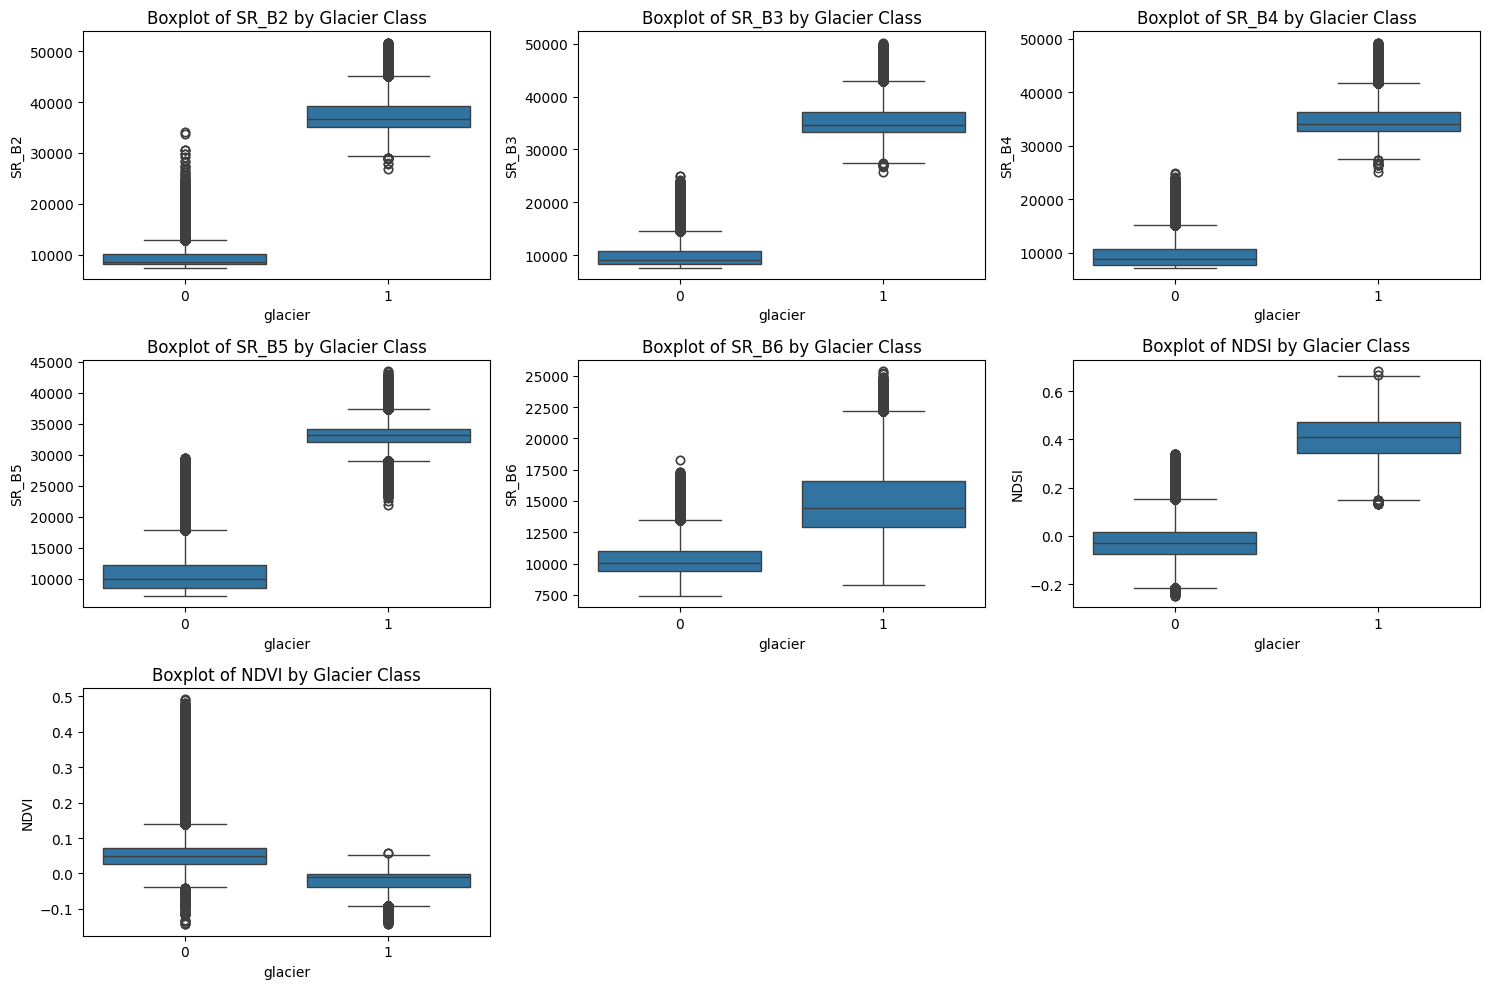

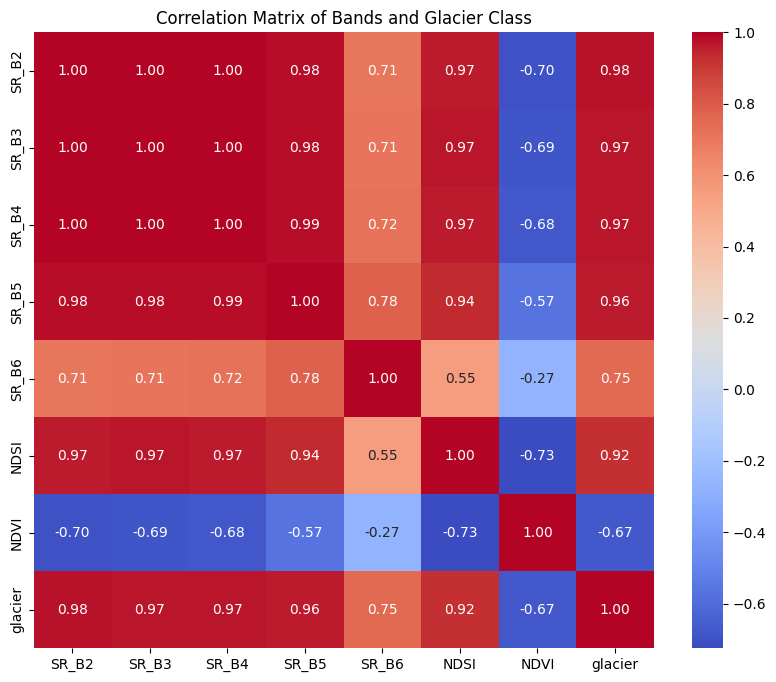

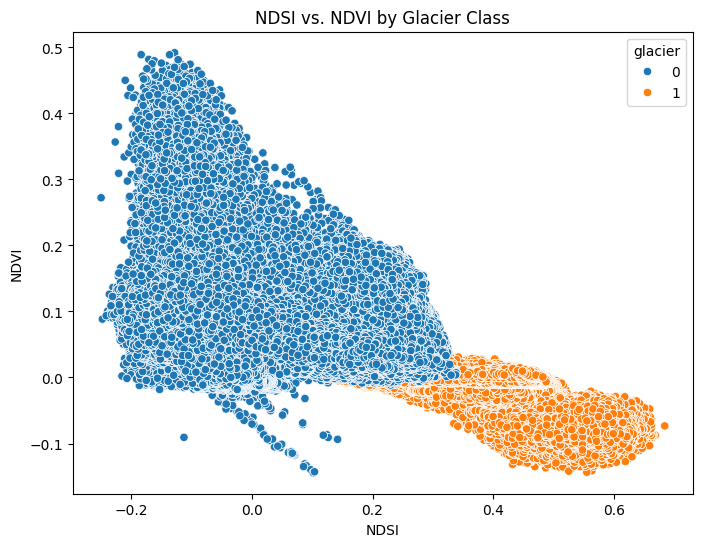

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_df' is your combined DataFrame with 'glacier' column and band values

# List of bands to analyze (replace with actual band names from your data)
bands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'NDSI', 'NDVI']

# Create the plots
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, band in enumerate(bands):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(x='glacier', y=band, data=combined_df)
    plt.title(f'Boxplot of {band} by Glacier Class')

plt.tight_layout()
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[bands + ['glacier']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bands and Glacier Class')
plt.show()

# Pairplot (if you have a smaller dataset for better visualization)
#sns.pairplot(combined_df, hue='glacier', vars=bands)
#plt.show()


# Scatter plots for specific band combinations (e.g., NDSI vs. NDVI)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NDSI', y='NDVI', hue='glacier', data=combined_df)
plt.title('NDSI vs. NDVI by Glacier Class')
plt.show()

# You can add more scatter plots for other band combinations as needed


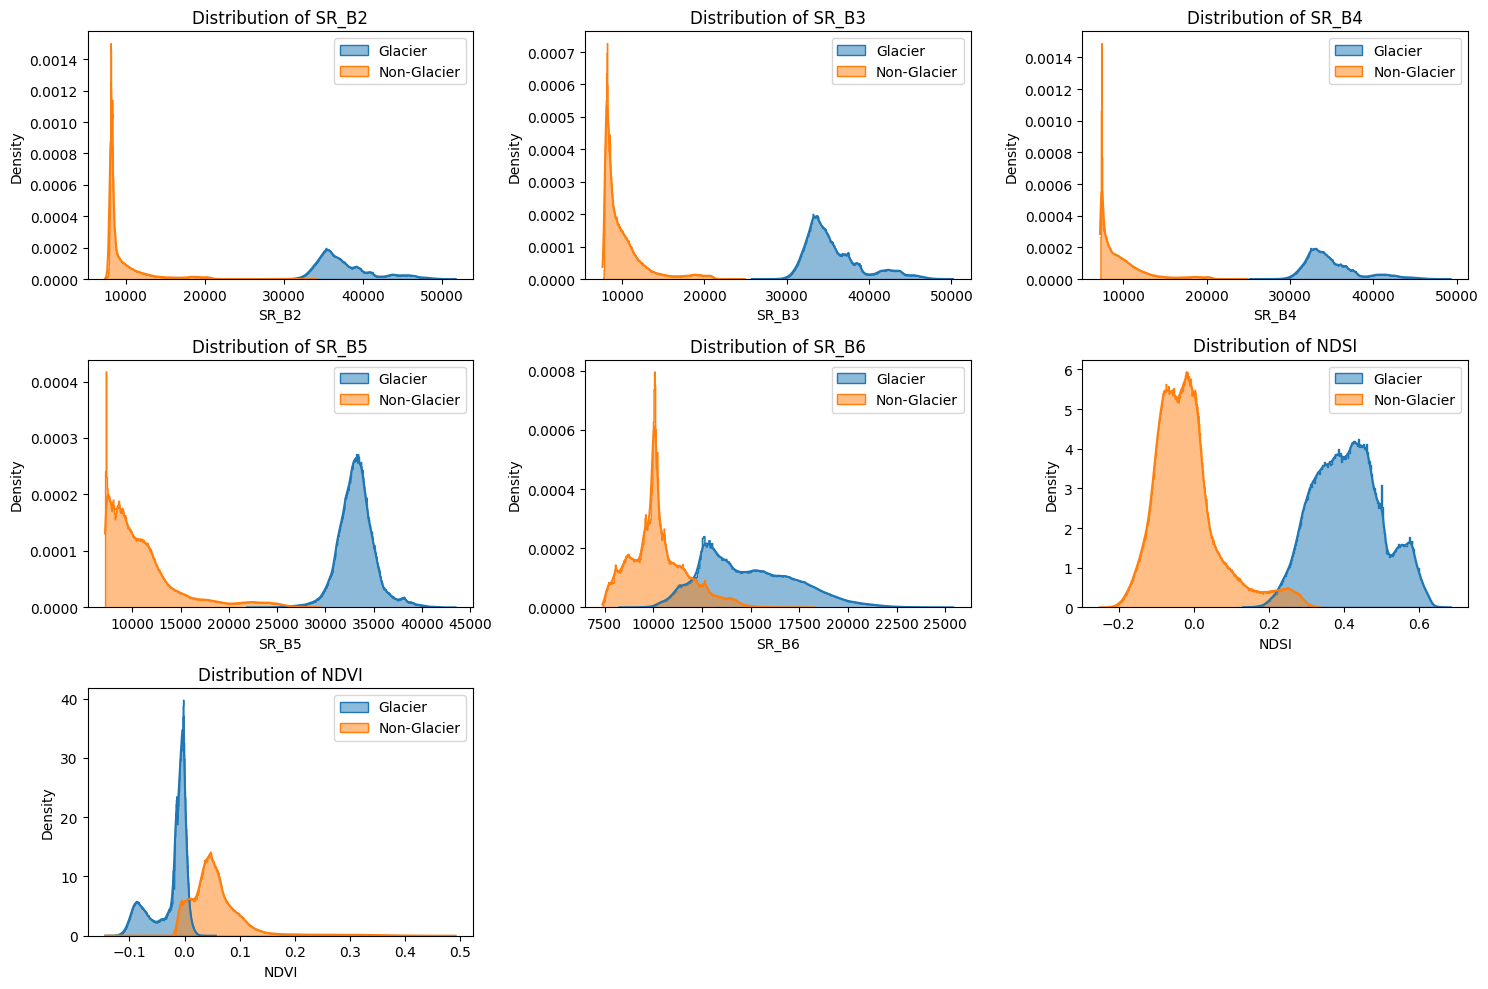

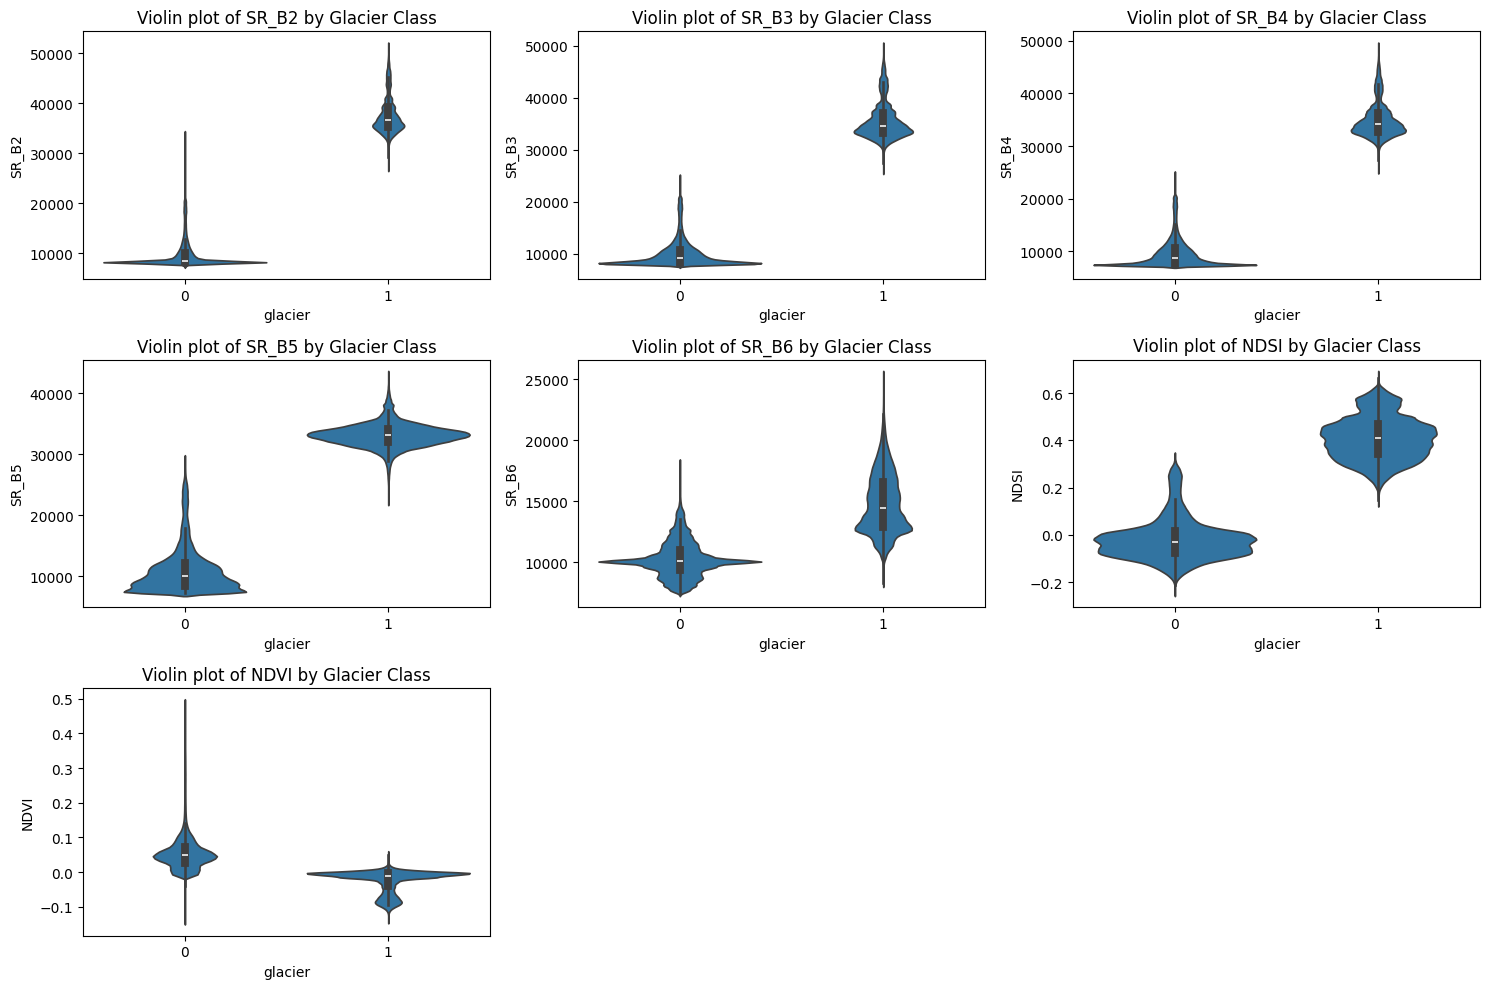

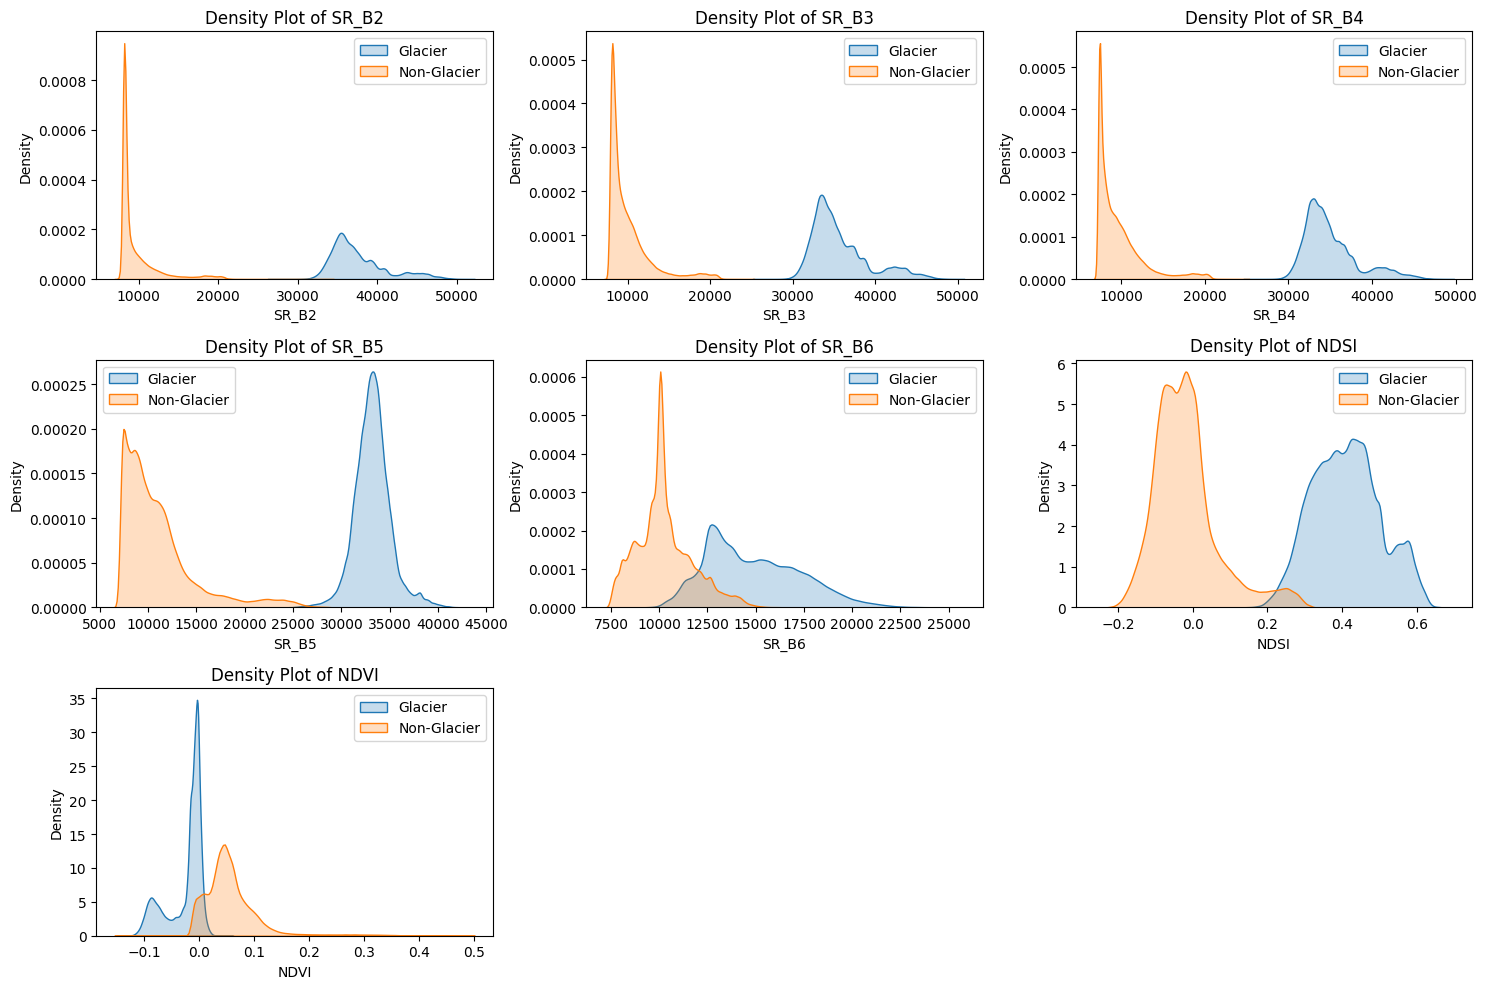

In [14]:


import matplotlib.pyplot as plt
import seaborn as sns




# Histograms for each band, separated by glacier class
plt.figure(figsize=(15, 10))
for i, band in enumerate(bands):
    plt.subplot(3, 3, i + 1)
    sns.histplot(combined_df[combined_df['glacier'] == 1][band], label='Glacier', kde=True, stat='density', element="step")
    sns.histplot(combined_df[combined_df['glacier'] == 0][band], label='Non-Glacier', kde=True, stat='density', element="step")
    plt.title(f'Distribution of {band}')
    plt.legend()

plt.tight_layout()
plt.show()

# Violin plots
plt.figure(figsize=(15, 10))
for i, band in enumerate(bands):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='glacier', y=band, data=combined_df)
    plt.title(f'Violin plot of {band} by Glacier Class')

plt.tight_layout()
plt.show()

# Density plots
plt.figure(figsize=(15, 10))
for i, band in enumerate(bands):
  plt.subplot(3, 3, i + 1)
  sns.kdeplot(combined_df[combined_df['glacier'] == 1][band], label='Glacier', fill=True)
  sns.kdeplot(combined_df[combined_df['glacier'] == 0][band], label='Non-Glacier', fill=True)
  plt.title(f'Density Plot of {band}')
  plt.legend()

plt.tight_layout()
plt.show()


In [15]:
!pip install pyarrow

# Save to Google Drive as Parquet
combined_df.to_parquet('/content/drive/MyDrive/all_samples.parquet', index=False)

In [24]:
!cd ..